In [1]:
# Import required libraries and dependencies

import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
%matplotlib inline


In [2]:
# Load .env enviroment variables into the notebook
load_dotenv()


True

In [3]:
# Get the API key from the environment variable and store as Python variable
quandl_api_key = os.getenv('QUANDL_API_KEY')

# Using the type funcion, confirm that the Quandl API key is available for use in the notebook
type(quandl_api_key)


str

In [4]:
# Create `start_date` and `end_date` variables
start_date = "2019-07-01"
end_date = "2021-07-01"


In [5]:
# Set the endpoint URL to access the endpoint for the Volatility Index
vix = "https://www.quandl.com/api/v3/datasets/CHRIS/CBOE_VX3?start_date=" + start_date + "&end_date=" + end_date + "&api_key=" + quandl_api_key


In [6]:
# Make the API call for the Volatility Index information using requests.get() function
response_vix = requests.get(vix).json()

## Print the response data using the json.dumps() function
# print(json.dumps(response_vix, indent=4, sort_keys=True))


In [7]:
# Create an empty list for appending useful data from the json dump response
volatility_index_data = []

# Use for-loop to grab info from "data" (secondary key) which is nested in "dataset" (primary key)
# Append specified items into volatility_index_data list
for item in response_vix["dataset"]["data"]:
        volatility_index_data.append(response_vix["dataset"]["data"])

# Check the first list of nested values in overall list
volatility_index_data[0][0]


['2021-06-29', 20.75, 21.15, 20.53, 20.9, 21.101, 0.351, 8984.0, 0.0, 31969.0]

In [8]:
# Convert all data from list into DataFrame using the Pandas from_dict() function
vix_all = pd.DataFrame.from_dict(volatility_index_data[0], orient='columns')

# Display the first and last 5 rows using the head() and tail() functions to confirm formatting
display(vix_all.head())
display(vix_all.tail())


,0,1,2,3,4,5,6,7,8,9
0,2021-06-29,20.75,21.15,20.53,20.90,21.1010,0.3510,8984.0,0.0,31969.0
1,2021-06-28,20.70,20.96,20.56,20.75,20.7500,-0.0998,6994.0,0.0,32149.0
2,2021-06-25,20.90,21.07,20.75,20.75,20.8498,-0.1002,8235.0,0.0,31972.0
3,2021-06-24,21.16,21.20,20.77,20.87,20.9500,-0.3190,8504.0,0.0,31760.0
4,2021-06-23,21.42,21.55,21.05,21.10,21.2690,-0.3310,11366.0,0.0,32426.0


,0,1,2,3,4,5,6,7,8,9
499,2019-07-08,16.15,16.50,16.06,16.44,16.425,0.30,27763.0,0.0,38648.0
500,2019-07-05,16.08,16.60,16.00,16.12,16.125,0.05,24137.0,0.0,36772.0
501,2019-07-03,16.16,16.32,16.05,16.05,16.075,-0.05,16116.0,0.0,34955.0
502,2019-07-02,16.57,16.70,16.10,16.15,16.125,-0.45,28151.0,0.0,35223.0
503,2019-07-01,16.85,16.86,16.50,16.55,16.575,-0.35,26607.0,0.0,34155.0


In [9]:
# Reverse the order of rows so that the start date is at the top of the list
vix_all = vix_all[::-1]

# Display the first and last 5 rows using the head() and tail() functions to confirm formatting
display(vix_all.head())
display(vix_all.tail())


,0,1,2,3,4,5,6,7,8,9
503,2019-07-01,16.85,16.86,16.50,16.55,16.575,-0.35,26607.0,0.0,34155.0
502,2019-07-02,16.57,16.70,16.10,16.15,16.125,-0.45,28151.0,0.0,35223.0
501,2019-07-03,16.16,16.32,16.05,16.05,16.075,-0.05,16116.0,0.0,34955.0
500,2019-07-05,16.08,16.60,16.00,16.12,16.125,0.05,24137.0,0.0,36772.0
499,2019-07-08,16.15,16.50,16.06,16.44,16.425,0.30,27763.0,0.0,38648.0


,0,1,2,3,4,5,6,7,8,9
4,2021-06-23,21.42,21.55,21.05,21.10,21.2690,-0.3310,11366.0,0.0,32426.0
3,2021-06-24,21.16,21.20,20.77,20.87,20.9500,-0.3190,8504.0,0.0,31760.0
2,2021-06-25,20.90,21.07,20.75,20.75,20.8498,-0.1002,8235.0,0.0,31972.0
1,2021-06-28,20.70,20.96,20.56,20.75,20.7500,-0.0998,6994.0,0.0,32149.0
0,2021-06-29,20.75,21.15,20.53,20.90,21.1010,0.3510,8984.0,0.0,31969.0


In [10]:
# Create headers for the new DataFrame using labels from the json dump
columns = ["Date",
           "Open",
           "High",
           "Low",
           "Close",
           "Settle",
           "Change",
           "Total Volume",
           "EFP",
           "Prev. Day Open Interest"
          ]

# Use the Pandas columns function to assign the list of headers to the columns in the DataFrame
vix_all.columns = columns

# Set the "Date" column as the index using the Pandas set_index() function
vix_all = vix_all.set_index('Date')

# Confirm the change using the head() function
vix_all.head()


,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
Date,,,,,,,,,
2019-07-01,16.85,16.86,16.50,16.55,16.575,-0.35,26607.0,0.0,34155.0
2019-07-02,16.57,16.70,16.10,16.15,16.125,-0.45,28151.0,0.0,35223.0
2019-07-03,16.16,16.32,16.05,16.05,16.075,-0.05,16116.0,0.0,34955.0
2019-07-05,16.08,16.60,16.00,16.12,16.125,0.05,24137.0,0.0,36772.0
2019-07-08,16.15,16.50,16.06,16.44,16.425,0.30,27763.0,0.0,38648.0


In [11]:
# Use the Pandas drop function to remove all columns except the date and the closing price data
vix_close = vix_all.drop(
    columns = ["Open",
               "High",
               "Low",
               "Settle",
               "Change",
               "Total Volume",
               "EFP",
               "Prev. Day Open Interest"
              ]
)

# Confirm the change using the head() function
vix_close.head()


,Close
Date,
2019-07-01,16.55
2019-07-02,16.15
2019-07-03,16.05
2019-07-05,16.12
2019-07-08,16.44


<AxesSubplot:title={'center':'VIX - Daily Close Prices'}, xlabel='Date'>

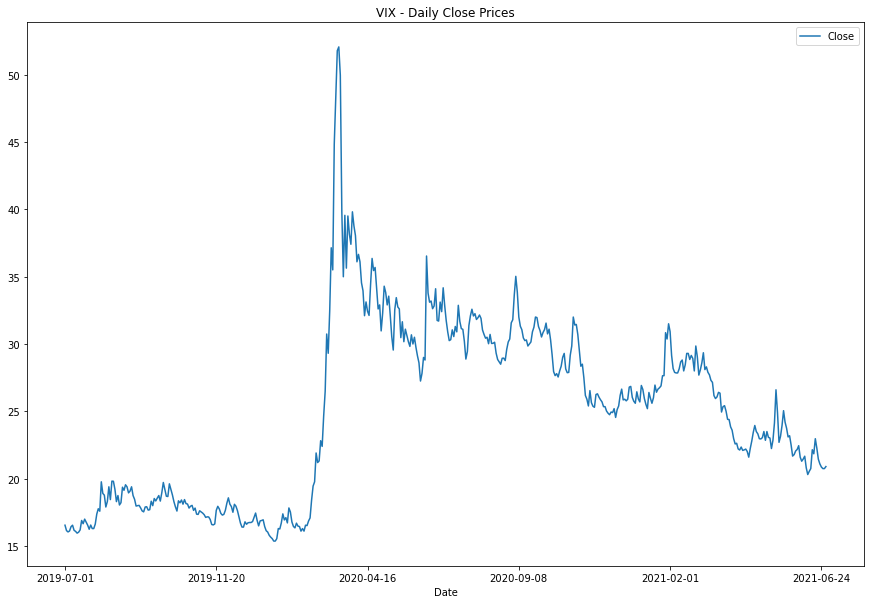

In [12]:
# Plot graph of VIX close prices to visualize the trend and to confirm function worked
vix_close.plot(figsize=(15,10), title='VIX - Daily Close Prices')

### Export DataFrame to CSV file

In [13]:
# Save VIX closing prices as exported CSV file
vix_close.to_csv('vix_closing_prices.csv')